<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** 
 - Rubén Hernández Guevara   
 - Luis Felipe Gómez Estrada  
**Fecha:** 08 de marzo del 2021.

**Expediente** : . 
**Expediente** : IF722749.  
**Profesor:** Oscar David Jaramillo Zuluaga.

Enlace al repositorio: <a href="https://github.com/if722749/ProyectoConjunto_RHernandez_LFGomez">https://github.com/if722749/ProyectoConjunto_RHernandez_LFGomez</a>
    
# Tarea 5: Clase 9

> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


# Luis Felipe Gómez Estrada

**Solución 1**

$$ U = \frac{2}{\pi}\sin^{-1}(\sqrt{x}) $$
$$ \frac{U\pi}{2} = \sin^{-1}(\sqrt{x}) $$
$$ \sin(\frac{U\pi}{2}) = \sqrt{x} $$
$$ x = \sin(\frac{U\pi}{2})^2 $$
$$ f(x) = \frac{1}{\pi \sqrt{x}\sqrt{1-x}} $$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

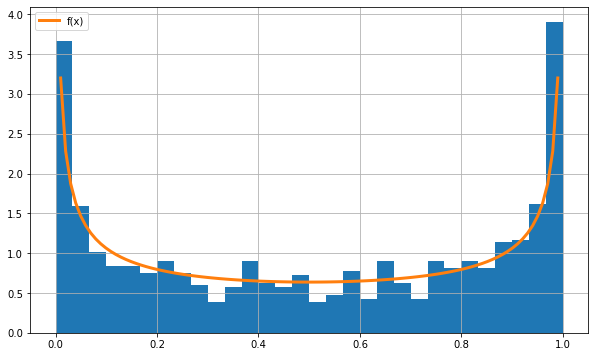

Wall time: 217 ms


In [2]:
%%time
########### Solución 1
def randomF(n: int) -> np.array:
    U = np.random.rand(n)
    x = np.sin(U*np.pi/2)**2
    return x

n = 1000
x = np.linspace(0.01, 0.99, 100)
f_x = lambda x: 1/(np.pi * np.sqrt(x) * np.sqrt(1-x))
y = f_x(x)

x2 = randomF(n)

plt.figure(figsize=(10,6))
plt.hist(x2, bins=30, density=True)
plt.plot(x, y, lw=3, label='f(x)')
plt.grid()
plt.legend()
plt.show()

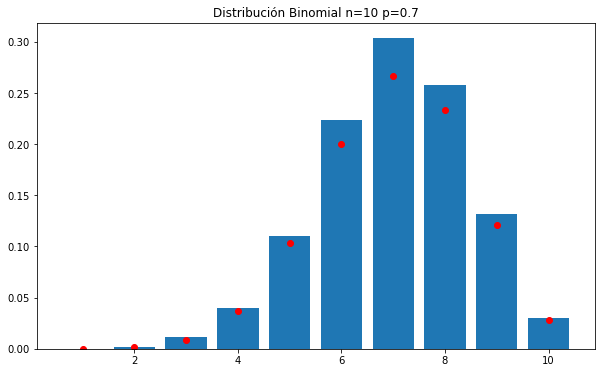

In [3]:
########### Solución 2
def binomial_distribution(n: int, p:float) -> np.array:
    pdf = np.zeros(n)
    for i in range(n):
        pdf[i] = np.math.factorial(n)/(np.math.factorial(i+1) * np.math.factorial(n - i - 1)) * p ** (i+1) * (1-p)**(n-i-1)
    return pdf
    
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in zip(range(len(indices)), indices)}
    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p<ui]) for ui in U])
    return y

n = 10
p = 0.7
pdf = binomial_distribution(n, p)
cdf = pdf.cumsum()
x_x = np.arange(1,n+1)

N = 10_000
x_r = Gen_distr_discreta(cdf, x_x, N)

y, x = np.histogram(x_r, bins=len(set(x_x)), density=True)
plt.figure(figsize=(10,6))
plt.bar(x_x, y)
plt.title(f'Distribución Binomial n={n} p={p}')
plt.plot(x_x, pdf, 'ro')
plt.show()

# Rubén Hernández Guevara

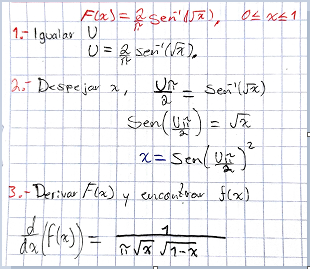


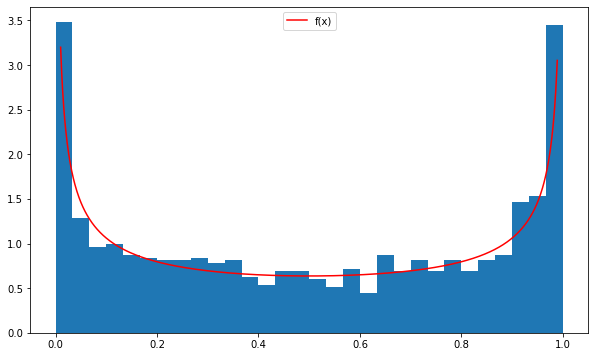

Wall time: 201 ms


In [4]:
%%time
########### Solución 1
u = np.random.rand(1000)
fx = np.sin(np.pi/2 * u)**2

x = np.arange(0.01,0.99,0.001)
y = 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))

plt.figure(figsize=(10,6))
plt.plot(x, y, color = 'r', label = 'f(x)')
plt.hist(fx, 30, density = True,)
plt.legend()
plt.show()

In [5]:
########### Solución 2
def dist_binomial(n: 'rango de números', p: 'Probabilidad'):
    fdp = np.zeros(n)
    for i in range(n):
        fdp[i] = np.math.factorial(n)/(np.math.factorial(i+1)*np.math.factorial(n-i-1))*p**(i+1)*(1-p)**(n-i-1)
    return fdp

In [6]:
def GVAD(p_acum: 'Probabilidad acumulada',
                       indices: 'Valores a generar',
                       N: 'N aleatorios a generar'):
    
    U = np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)
    return y

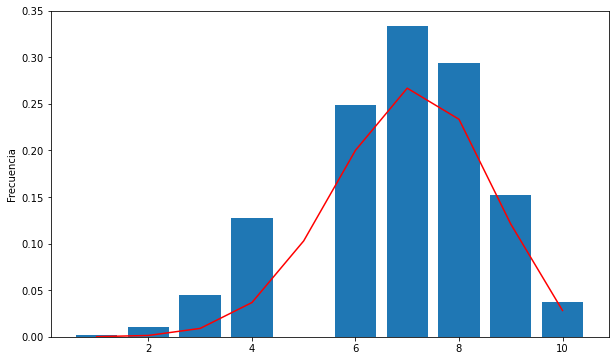

In [7]:
prob = 0.7
n = 10
valores = np.arange(1, n+1)
fdp = dist_binomial(n, prob)
fdp_ac = fdp.cumsum()

N = 10000
v = GVAD(fdp_ac, valores, N)

y, x = np.histogram(v, bins = len(set(valores)), density=True)
plt.figure(figsize=(10,6))
plt.bar(valores, y)
plt.plot(valores, fdp, c = 'r')
plt.ylabel('Frecuencia')
plt.show()